# Determining and Predicting Loan Repayment Status using Decision Trees and Random Forests

## Description

For better or for worse, loan lending and debt repayment forms the bedrock of efficient and productive allocation of economic resources in our modern financial systems. In the realm of financial institutions, determining the creditworthiness of loan applicants is crucial for minimizing default risks and maximizing profitability. This project aims to leverage the power of machine learning, specifically decision trees, to predict the repayment status of loans. To build this decision tree, I will be using lending data from peer-to-peer lending service LendingClub from the years 2007 to 2010.

## Code

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Getting the Data

In [2]:
loans = pd.read_csv('loan_data.csv')

In [6]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [9]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In order to determine the loan repayment status, we are given 13 different variables from which we can train our decision tree on as well as the status the repayment s tatus of the loan. These variables are:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

### Exploratory Data Analysis

Text(0.5, 0, 'FICO')

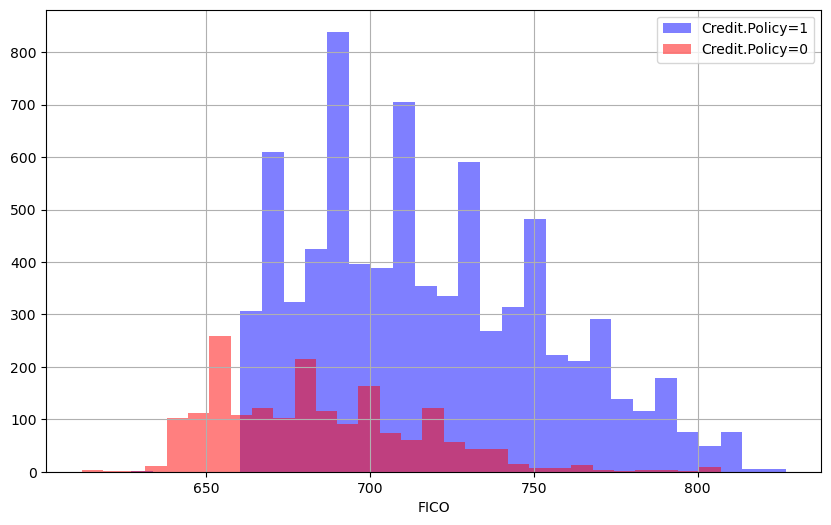

In [3]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

From this histogram, we can see that credit policy was more often given to borrowers with higher FICO scores, while seldom given to borrowers with lower FICO scores. This matches up with our intuition that people with higher FICO scores, a number indicating credit trustworthiness, would be given the credit policy given to people borrowers who meet the underwriting criteria of LendingClub.

Text(0.5, 0, 'FICO')

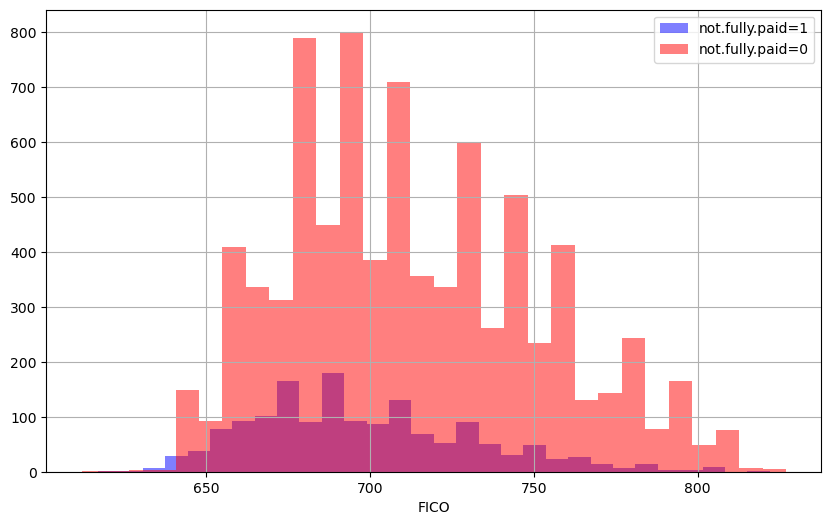

In [4]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

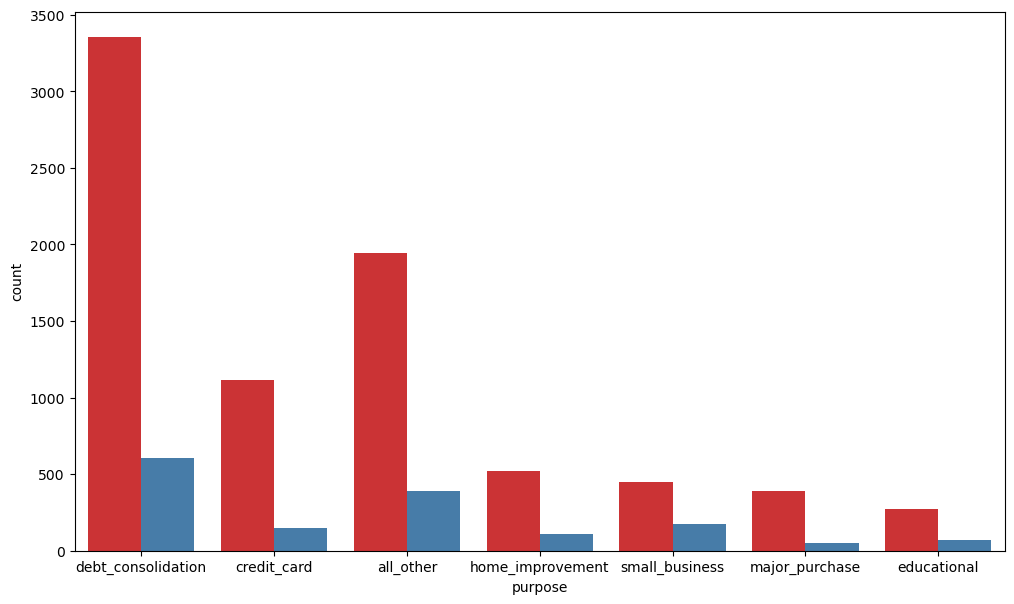

In [11]:
plt.figure(figsize=(12,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

c:\Users\justi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\justi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


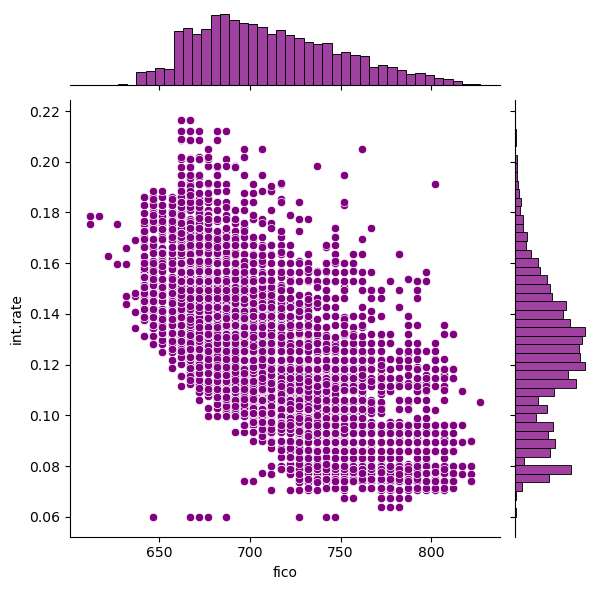

In [6]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

<Figure size 1100x700 with 0 Axes>

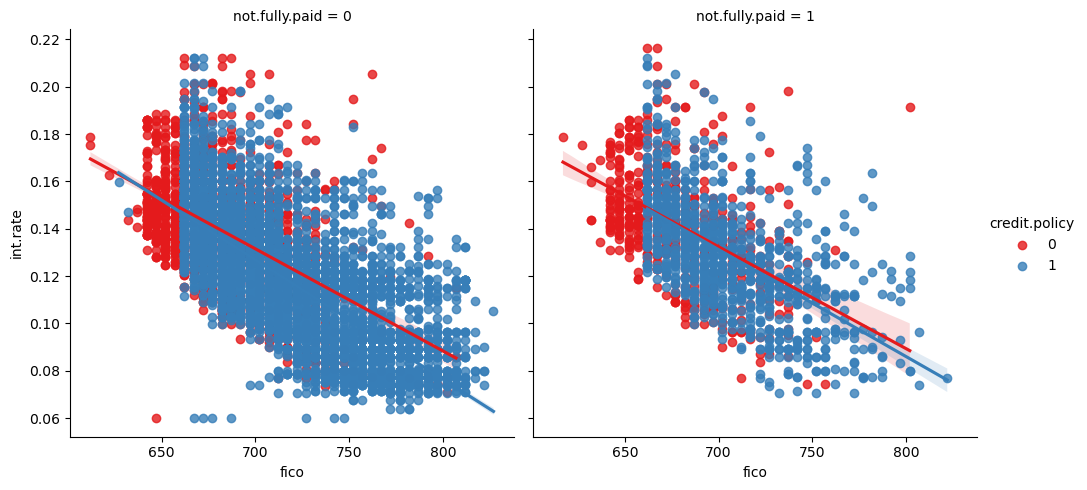

In [12]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy', col='not.fully.paid',palette='Set1')

### Setting up the Data

Since our purpose column is categorical data, we will need to transform this data to in order to train on this data. To do this, we will be using dummy variables.

In [15]:
cat_feats = ["purpose"]

In [16]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

### Training the Decision Tree

In [17]:
from sklearn.model_selection import train_test_split
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

### Predictions and Evaluation of Decision Tree

In [19]:
predictions = dtree.predict(X_test)

In [30]:
y_test.value_counts()

not.fully.paid
0    2431
1     443
Name: count, dtype: int64

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay 

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.25      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.76      0.73      0.74      2874



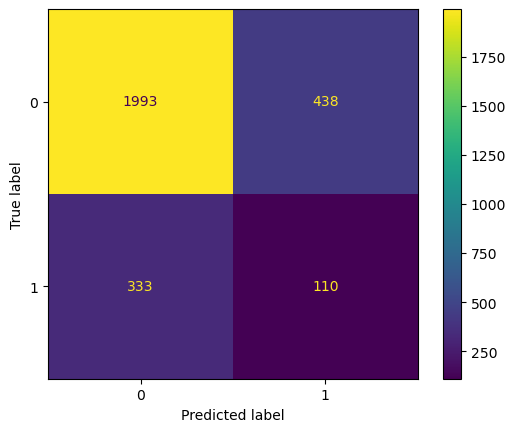

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,predictions))
disp.plot() 
plt.show()

Using this decision tree model, we can see that it struggles seems to struggle with predicting a lot with false positives, having almost as many false positives total as there are positive values in the testing data split. With an accuracy of 73%, there is some room for improvement. Let's see what happens if we incorporate Random Forests.

### Retraining Model Using Random Forests

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [27]:
predictions = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.59      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.72      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



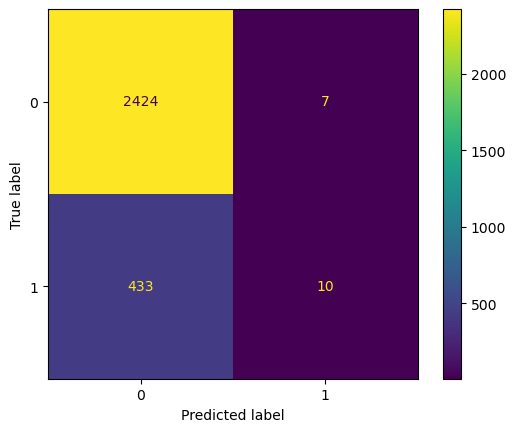

In [28]:
print(classification_report(y_test, predictions))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions))
disp.plot() 
plt.show()

### Conclusion

As we can see, using Random Forests yielded us an accuracy of 85%. Although this is better than using just a Decision Tree, this accuracy seems to have come from the model predicting nearly every label to be a negative label of 0, with the model only predicting 17 positive labels out of 443 true positive labels, with only 10 of those 17 being true positives. And with loan lenders looking to be as conservative as possible to minimize risk as lona defualts can lead to financial disaster, this Random Forest Decision Tree Model would not be the right tool for predicting loan repayments. To improve this model, there needs to be more feature engineering.